In [1]:
#Importing libraaries
import tensorflow as tf 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf

# Define the training dataset path
train_path = r"C:\Users\ayush\Downloads\archive (1)\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train"

# Training image preprocess
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,                # Correctly pass the path
    labels="inferred",         # Infer labels from subdirectory names
    label_mode="categorical",  # Categorical labels for multi-class classification
    class_names=None,          # Automatically inferred from subdirectory names
    color_mode="rgb",          # Images are read as RGB
    batch_size=32,             # Batch size
    image_size=(128, 128),     # Resize all images to 128x128
    shuffle=True,              # Shuffle the dataset
    seed=42,                   # Seed for reproducibility
    validation_split=None,     # No split here
    subset=None,               # No subset specified
    interpolation="bilinear",  # Resize interpolation
    follow_links=False,        # Don't follow symlinks
    crop_to_aspect_ratio=False # Don't crop to maintain aspect ratio
)


Found 70295 files belonging to 38 classes.


In [3]:
import tensorflow as tf

# Define the training dataset path
valid_path = r"C:\Users\ayush\Downloads\archive (1)\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid"

# Training image preprocess
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,                # Correctly pass the path
    labels="inferred",         # Infer labels from subdirectory names
    label_mode="categorical",  # Categorical labels for multi-class classification
    class_names=None,          # Automatically inferred from subdirectory names
    color_mode="rgb",          # Images are read as RGB
    batch_size=32,             # Batch size
    image_size=(128, 128),     # Resize all images to 128x128
    shuffle=True,              # Shuffle the dataset
    seed=42,                   # Seed for reproducibility
    validation_split=None,     # No split here
    subset=None,               # No subset specified
    interpolation="bilinear",  # Resize interpolation
    follow_links=False,        # Don't follow symlinks
    crop_to_aspect_ratio=False # Don't crop to maintain aspect ratio
)


Found 17572 files belonging to 38 classes.


In [4]:
training_set


<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[158.   138.   137.  ]
   [161.75 141.75 140.75]
   [161.75 141.75 140.75]
   ...
   [199.5  181.5  181.5 ]
   [195.75 177.75 177.75]
   [182.25 164.25 164.25]]

  [[166.5  146.5  145.5 ]
   [149.   129.   128.  ]
   [154.75 134.75 133.75]
   ...
   [179.75 161.75 161.75]
   [177.25 159.25 159.25]
   [192.5  174.5  174.5 ]]

  [[155.75 135.75 134.75]
   [153.75 133.75 132.75]
   [161.75 141.75 140.75]
   ...
   [181.25 163.25 163.25]
   [192.75 174.75 174.75]
   [187.75 169.75 169.75]]

  ...

  [[106.5   92.5   81.5 ]
   [100.5   86.5   75.5 ]
   [101.    87.    76.  ]
   ...
   [124.   116.75  91.75]
   [126.75 109.5   96.25]
   [131.25 106.75  99.25]]

  [[102.75  90.75  78.75]
   [ 96.5   84.5   72.5 ]
   [ 98.75  86.75  74.75]
   ...
   [ 87.    85.    57.  ]
   [110.25  98.5   83.5 ]
   [150.25 132.25 122.5 ]]

  [[101.75  89.75  77.75]
   [ 91.75  79.75  67.75]
   [ 95.    83.    71.  ]
   ...
   [ 75.5   78.    49.5 ]
   [ 28.5   21.5    7.75]
   [ 46.75  34.25  2

#avoid overshooting
1.Choose small learning rate default 0.001 we are taking 0.0001
2.There may be chance of undefitting, so increase number of neurons
3.Add more convolution layer to extract more feature from images there may be possiblity that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

In [7]:
# Building model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.models import Sequential


In [8]:
model = Sequential()

In [9]:
#Building convolution layer

In [10]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [11]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [12]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [13]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [14]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [15]:
model.add(Dropout(0.25))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(units=1500, activation='relu'))


In [18]:
model.add(Dropout(0.4)) #To avoid overfitting

In [19]:
#Output layer
model.add(Dense(units=38,activation='softmax'))

Compiling Model

In [21]:
model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

Model training

In [24]:






training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 264s 118ms/step - loss: 1.3137 - accuracy: 0.6126 - val_loss: 0.4867 - val_accuracy: 0.8453
Epoch 2/10
2197/2197 [==============================] - 254s 115ms/step - loss: 0.4409 - accuracy: 0.8612 - val_loss: 0.2666 - val_accuracy: 0.9131
Epoch 3/10
2197/2197 [==============================] - 256s 117ms/step - loss: 0.2619 - accuracy: 0.9154 - val_loss: 0.2656 - val_accuracy: 0.9171
Epoch 4/10
2197/2197 [==============================] - 255s 116ms/step - loss: 0.1849 - accuracy: 0.9395 - val_loss: 0.1742 - val_accuracy: 0.9461
Epoch 5/10
2197/2197 [==============================] - 254s 115ms/step - loss: 0.1354 - accuracy: 0.9554 - val_loss: 0.1669 - val_accuracy: 0.9481
Epoch 6/10
2197/2197 [==============================] - 257s 117ms/step - loss: 0.1036 - accuracy: 0.9660 - val_loss: 0.1123 - val_accuracy: 0.9659
Epoch 7/10
2197/2197 [==============================] - 253s 115ms/step - loss: 0.0890 - accuracy: 0.9719 - val_

In [25]:
#Model Evaluation on training set
model.save('trained_model.keras')
    

In [49]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 79s 36ms/step - loss: 0.0206 - accuracy: 0.9933


In [51]:
print(train_loss,train_acc)

0.020606588572263718 0.9932569861412048


In [53]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 20s 36ms/step - loss: 0.1092 - accuracy: 0.9683


In [55]:
print(val_loss,val_acc)

0.10919593274593353 0.9683018326759338


In [57]:
training_history.history

{'loss': [1.3136630058288574,
  0.4408795237541199,
  0.2619110345840454,
  0.18486148118972778,
  0.1353786587715149,
  0.1036328598856926,
  0.08900172263383865,
  0.07385119050741196,
  0.064073346555233,
  0.0572538785636425],
 'accuracy': [0.6126324534416199,
  0.8612134456634521,
  0.9153851866722107,
  0.9394978284835815,
  0.9553595781326294,
  0.9659719467163086,
  0.9718614220619202,
  0.9764421582221985,
  0.9790881276130676,
  0.9812646508216858],
 'val_loss': [0.48673754930496216,
  0.2666267156600952,
  0.2655636966228485,
  0.17422017455101013,
  0.16692139208316803,
  0.1123247742652893,
  0.14205704629421234,
  0.14710769057273865,
  0.1191226914525032,
  0.10919593274593353],
 'val_accuracy': [0.8452652096748352,
  0.9131003618240356,
  0.9170839786529541,
  0.9460505247116089,
  0.9480992555618286,
  0.9658547639846802,
  0.9560664892196655,
  0.954359233379364,
  0.9646596908569336,
  0.9683018326759338]}

In [61]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

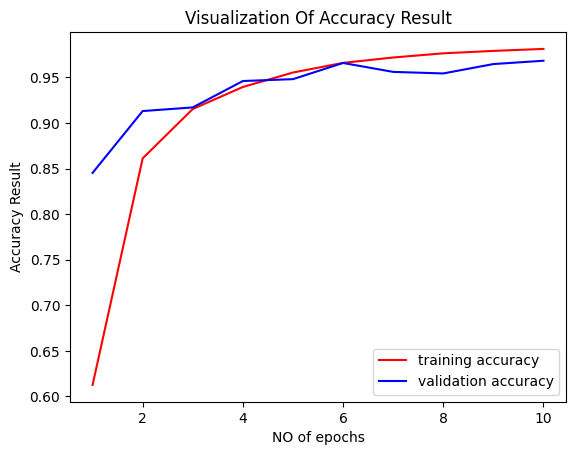

In [73]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='training accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='validation accuracy')
plt.xlabel("NO of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization Of Accuracy Result")
plt.legend()
plt.show()

In [75]:
#Some other metrics for model evaluation
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [77]:
test_set =  tf.keras.utils.image_dataset_from_directory(
    valid_path,                # Correctly pass the path
    labels="inferred",         # Infer labels from subdirectory names
    label_mode="categorical",  # Categorical labels for multi-class classification
    class_names=None,          # Automatically inferred from subdirectory names
    color_mode="rgb",          # Images are read as RGB
    batch_size=32,             # Batch size
    image_size=(128, 128),     # Resize all images to 128x128
    shuffle=False,              # Shuffle the dataset
    seed=None,                   # Seed for reproducibility
    validation_split=None,     # No split here
    subset=None,               # No subset specified
    interpolation="bilinear",  # Resize interpolation
    follow_links=False,        # Don't follow symlinks
    crop_to_aspect_ratio=False # Don't crop to maintain aspect ratio
)

Found 17572 files belonging to 38 classes.


In [79]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 29s 51ms/step


(array([[1.00000000e+00, 1.18147408e-12, 1.60515047e-14, ...,
         6.30988255e-23, 3.91202787e-22, 4.54701021e-21],
        [9.99998569e-01, 1.46665400e-06, 2.52168382e-12, ...,
         6.10549506e-19, 1.85988616e-17, 2.61436901e-17],
        [1.00000000e+00, 5.21186230e-13, 1.52375976e-15, ...,
         3.46714560e-23, 4.25452452e-22, 2.19973841e-21],
        ...,
        [1.44786867e-08, 3.99072664e-10, 1.17692377e-06, ...,
         2.84678414e-09, 1.02457942e-09, 9.99960423e-01],
        [3.76261002e-12, 3.92167911e-15, 4.86126861e-10, ...,
         2.81124126e-12, 8.82565559e-13, 1.00000000e+00],
        [1.00948295e-11, 4.83566637e-13, 4.41724305e-12, ...,
         6.52291346e-11, 6.14937379e-10, 9.65320706e-01]], dtype=float32),
 (17572, 38))

In [81]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [82]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [87]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [91]:
Y_true = tf.argmax(true_categories,axis = 1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [99]:
from sklearn.metrics import classification_report , confusion_matrix

In [100]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.99      0.97       504
                                 Apple___Black_rot       0.94      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.97      0.99      0.98       440
                                   Apple___healthy       0.98      0.96      0.97       502
                               Blueberry___healthy       0.97      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.94      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.96      0.

In [101]:
cm =confusion_matrix(Y_true,predicted_categories)
cm

array([[497,   2,   0, ...,   0,   0,   0],
       [  0, 494,   1, ...,   0,   0,   0],
       [  0,   0, 437, ...,   0,   0,   0],
       ...,
       [  0,   0,   1, ..., 488,   0,   0],
       [  0,   0,   0, ...,   0, 447,   0],
       [  1,   0,   0, ...,   0,   0, 468]], dtype=int64)

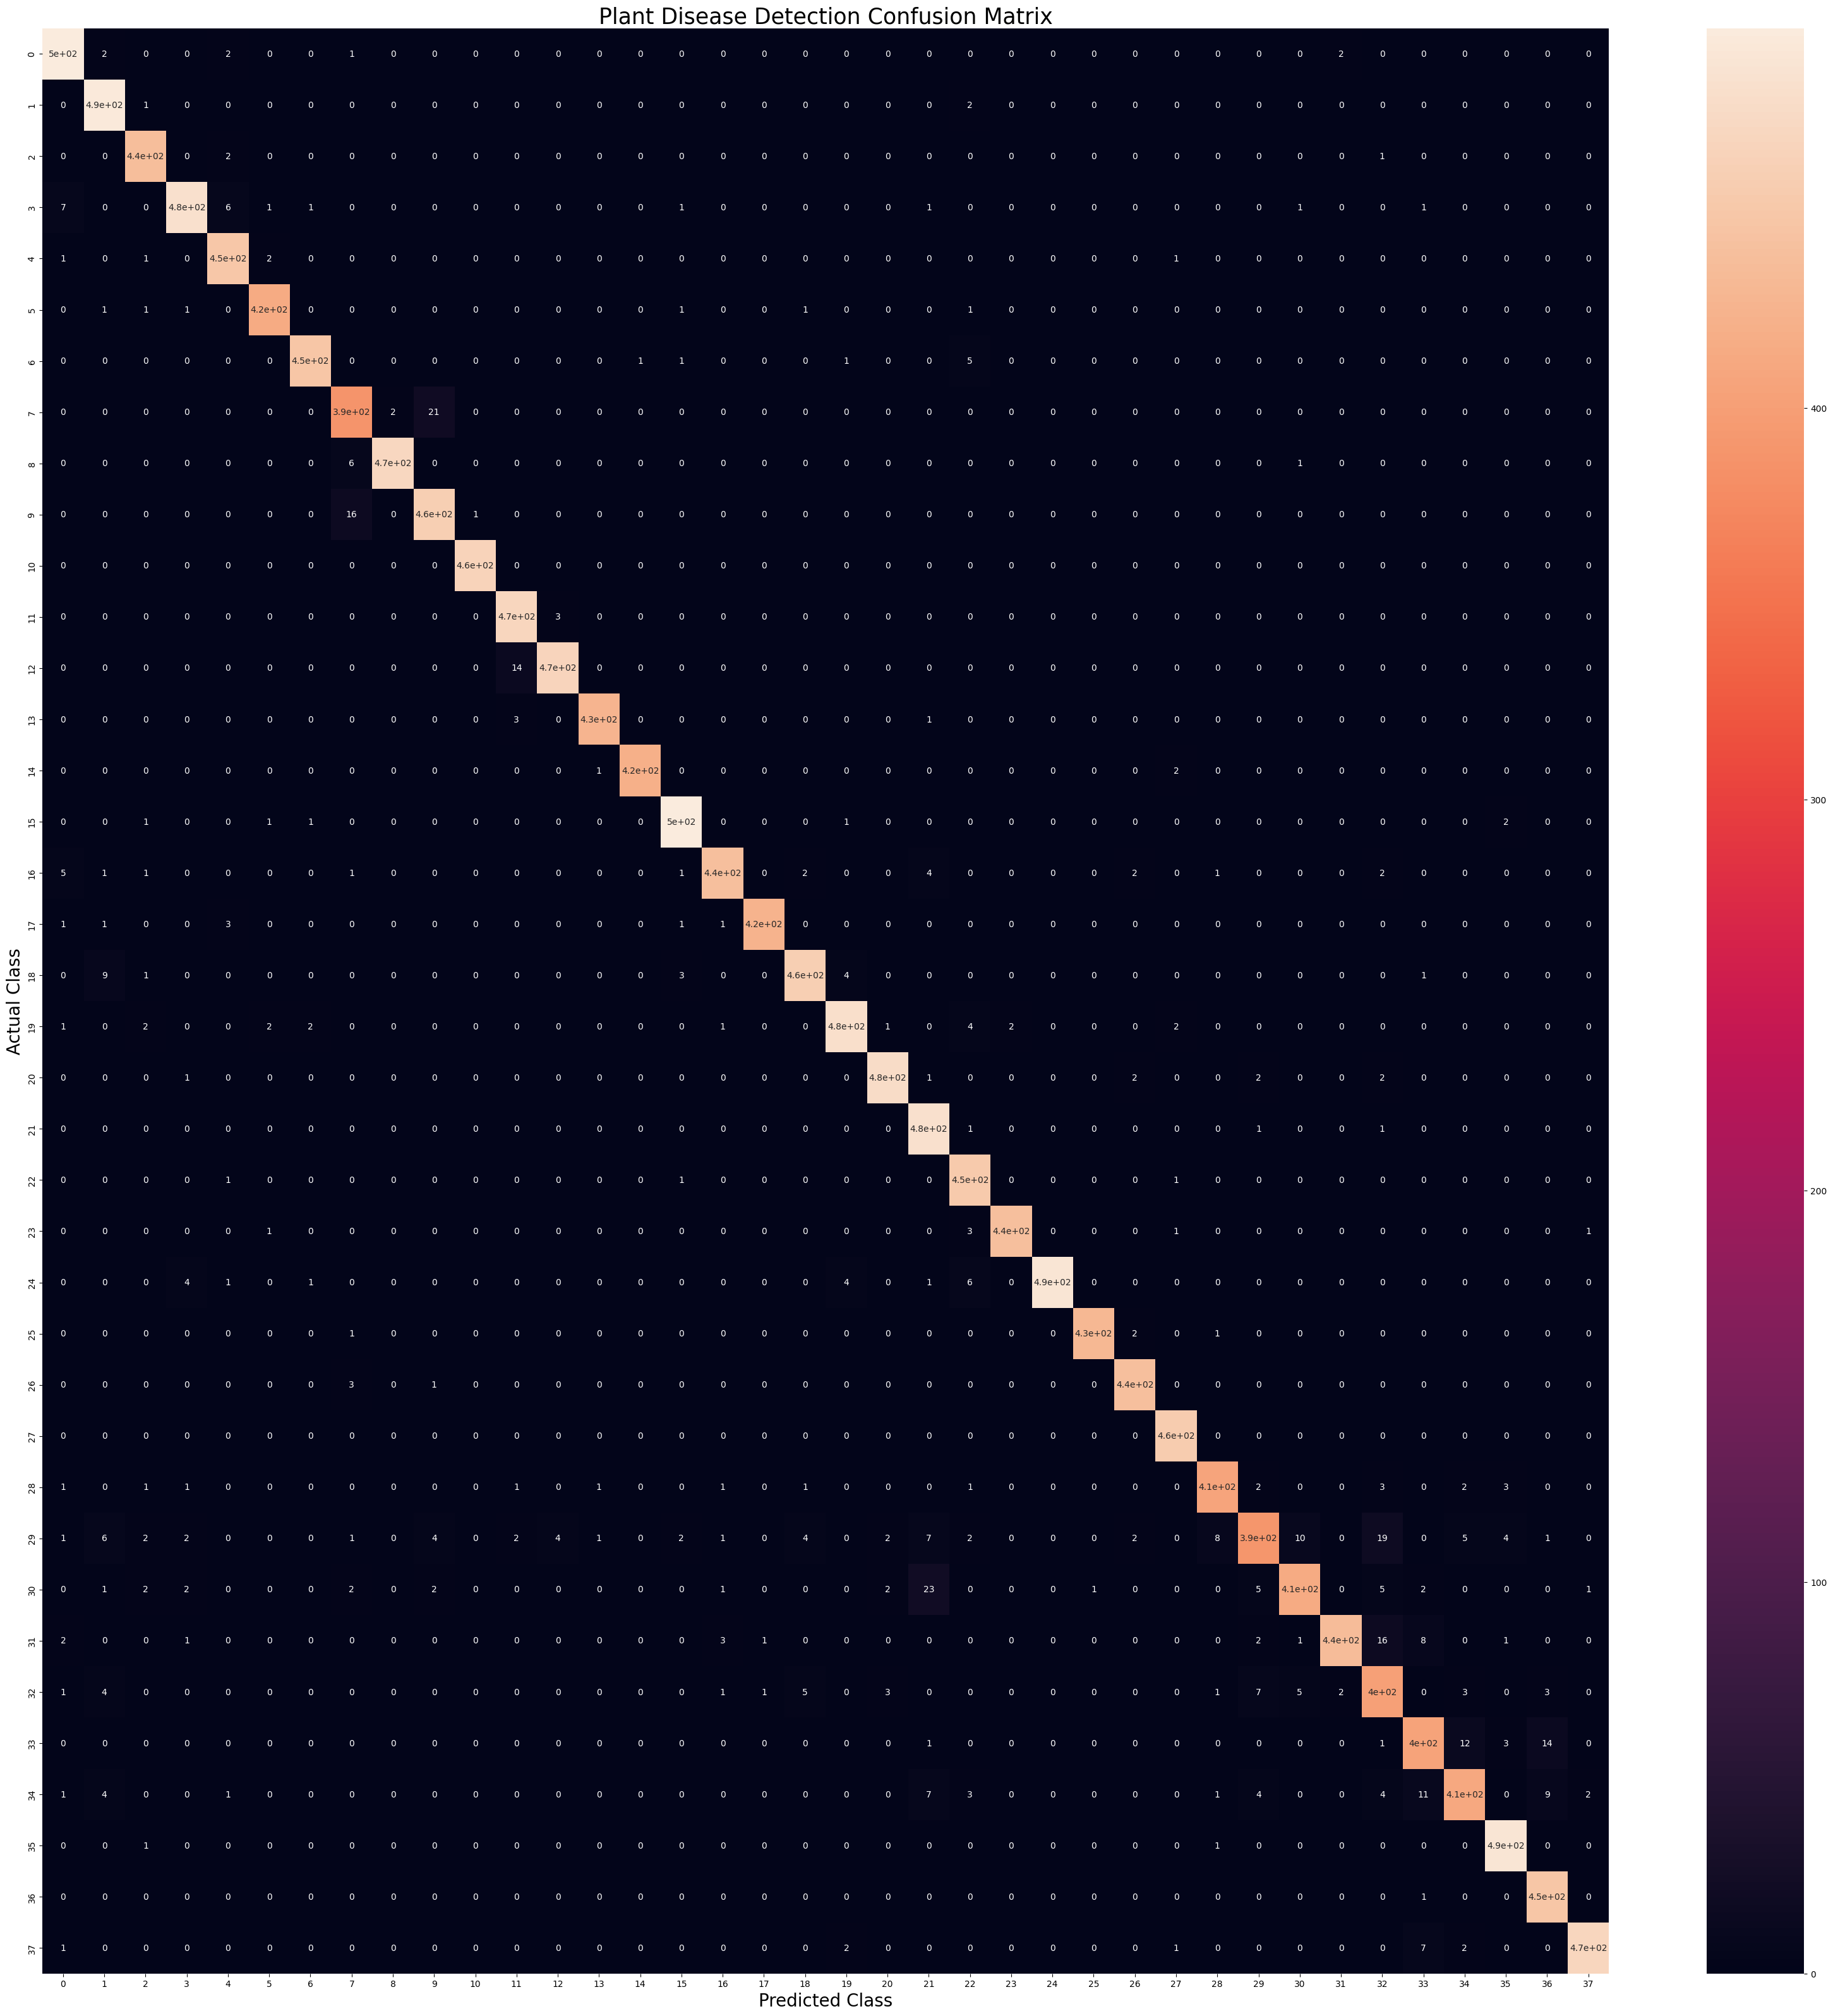

In [102]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize = 20) 
plt.title("Plant Disease Detection Confusion Matrix",fontsize=25)
plt.show()           